In [1]:
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastai.vision.all import *

In [3]:
def search_func(keyword,max_images=30):
    print('downloading ',keyword)
    return L(ddg_images(keyword,max_results=max_images)).itemgot('image')

In [2]:
# from fastdownload import download_url
# searches=['Chris Hemsworth','Christopher Robert Evans','scarlett johansson']
path=Path('Celebs_face_identify')
# from time import sleep
# for s in searches:
#     dest=(path/s)
#     dest.mkdir(exist_ok=True,parents=True)
#     download_images(dest,urls=search_func(f'{s} face photo'))
#     sleep(2)
#     resize_images(path/s,max_size=400,dest=path/s)

In [6]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [ ]:
dls=DataBlock(
              blocks=(ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(valid_pct=0.2,seed=42),
              get_y=parent_label,
              item_tfms=[Resize(192,method='squish')]
             ).dataloaders(path,bs=32)
dls.show_batch(max_n=6)

In [8]:
learner=vision_learner(dls,vgg16,metrics=error_rate)
learner.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.197613,1.577835,0.761905,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.771674,1.320949,0.666667,00:07
1,1.496229,0.997984,0.428571,00:07
2,1.353675,0.889433,0.428571,00:06
3,1.170013,0.830199,0.428571,00:06
4,1.028464,0.816507,0.380952,00:06
5,0.909128,0.805859,0.380952,00:07


In [57]:
# !pwd
nam,_,chance=learner.predict(PILImage.create('/Volumes/THALURU/DS/FastAI/chapter-1/Celebs_face_identify/chris3.webp'))
print(nam,f'{chance[0]:.4f}')

Christopher Robert Evans 0.4425


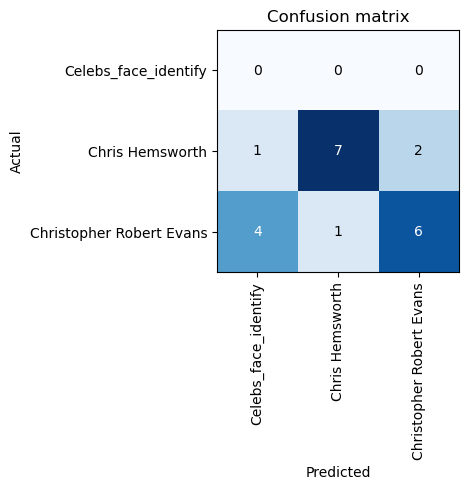

In [9]:
interp=ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()